# K-Means Clustering

In [3]:
# importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# Loadin
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
df.duplicated().sum()

0

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


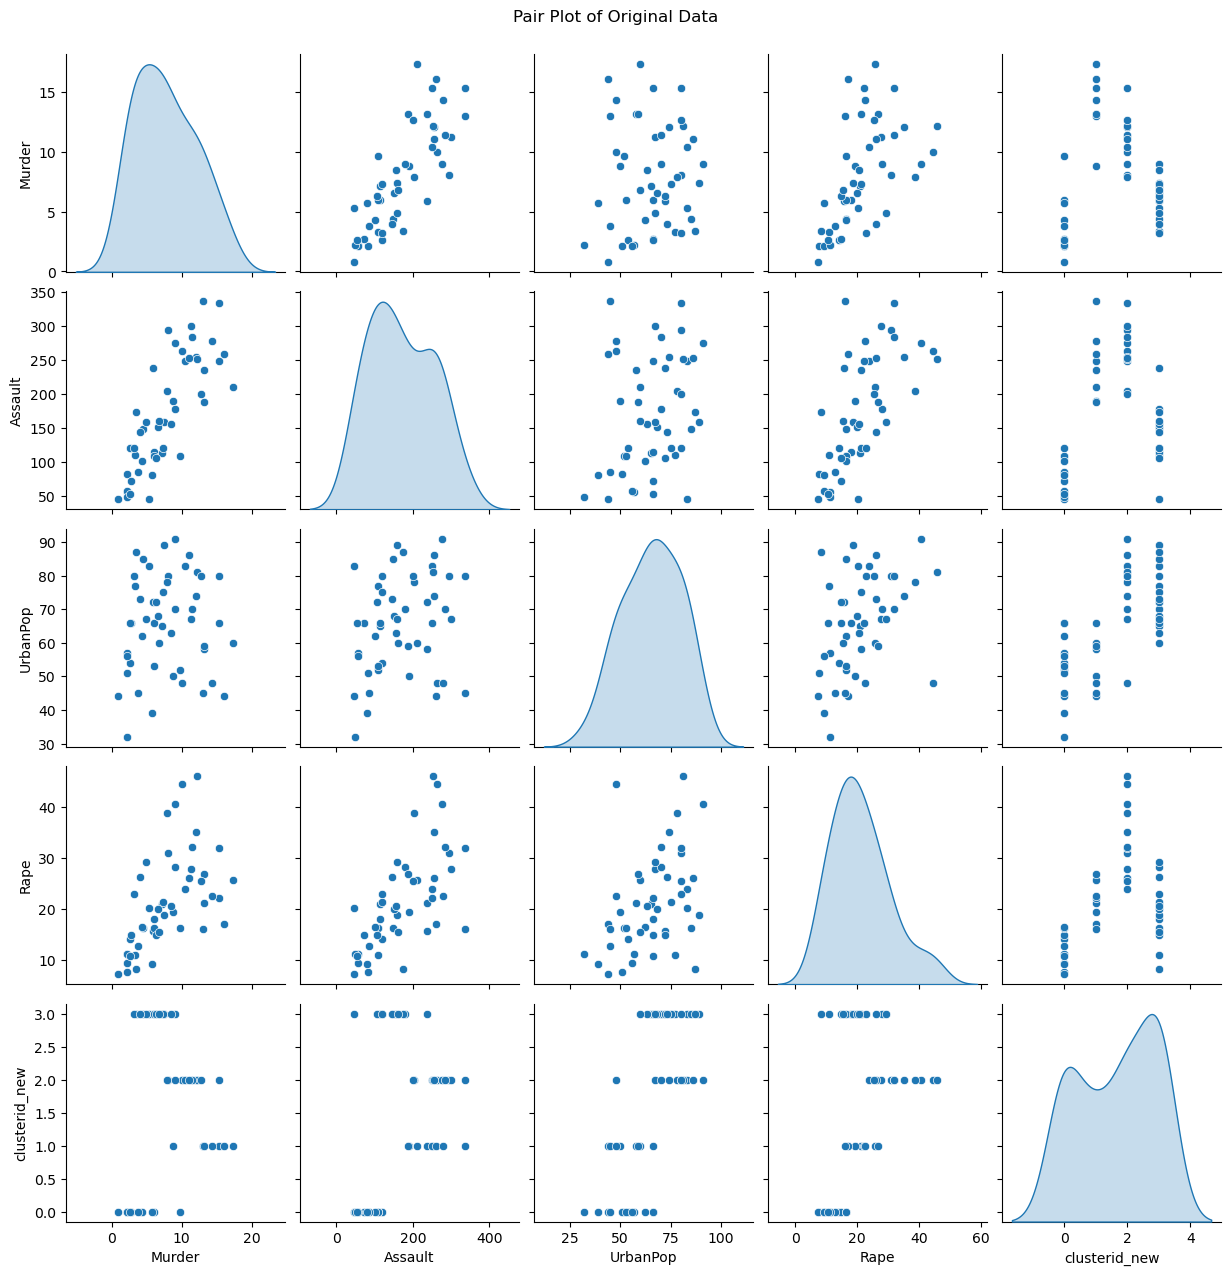

In [21]:
import seaborn as sns

# Pair plot for original data
sns.pairplot(df.iloc[:, 1:], diag_kind='kde')
plt.suptitle('Pair Plot of Original Data', y=1.02)
plt.show()


In [9]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])

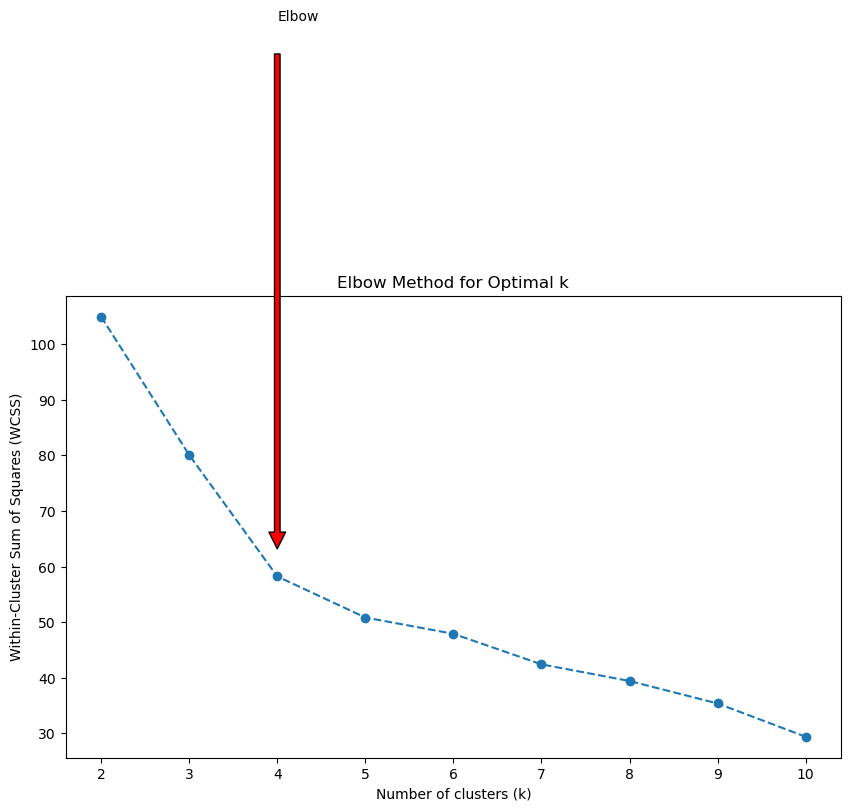

In [11]:
# Elbow Method 
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

# Annotate the elbow point
plt.annotate('Elbow',
             xy=(4, wcss[2]),
             xytext=(4, wcss[2] + 100),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )

plt.show()


In [12]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_df)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [13]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 3, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [14]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_

In [15]:
df['clusterid_new']

0     1
1     2
2     2
3     1
4     2
5     2
6     3
7     3
8     2
9     1
10    3
11    0
12    2
13    3
14    0
15    3
16    0
17    1
18    0
19    2
20    3
21    2
22    0
23    1
24    3
25    0
26    0
27    2
28    0
29    3
30    2
31    2
32    1
33    0
34    3
35    3
36    3
37    3
38    3
39    1
40    0
41    1
42    2
43    3
44    0
45    3
46    3
47    0
48    0
49    3
Name: clusterid_new, dtype: int32

In [16]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-0.44878894, -0.35858791,  0.56576856, -0.20455729]])

In [17]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
cluster_means = df.groupby('clusterid_new')[numeric_columns].mean().reset_index()
print(cluster_means)

   clusterid_new     Murder     Assault   UrbanPop       Rape
0              0   3.600000   78.538462  52.076923  12.176923
1              1  13.937500  243.625000  53.750000  21.412500
2              2  10.966667  264.000000  76.500000  33.608333
3              3   5.852941  141.176471  73.647059  19.335294


In [18]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_df, clusters_new.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.3441080718209351


<function matplotlib.pyplot.show(close=None, block=None)>

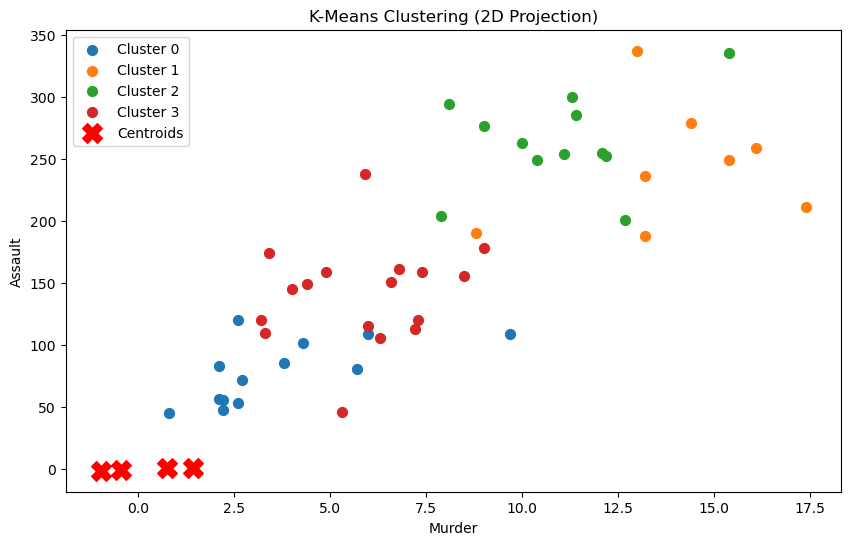

In [19]:
plt.figure(figsize=(10, 6))

for cluster in range(4):
    cluster_data = df[df['clusterid_new'] == cluster]
    plt.scatter(cluster_data['Murder'], cluster_data['Assault'], label=f'Cluster {cluster}', s=50)

plt.scatter(clusters_new.cluster_centers_[:, 0], clusters_new.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('K-Means Clustering (2D Projection)')
plt.legend()
plt.show
